# Исследование крупного интернет-магазина 
Есть данные с гипотезами по увеличению выручки интернет-магазина, два файла с результатами A/B-теста.

# Цель исследования
Подготовим к анализу и изучим данные. Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты чтобы увеличить выручку интернет-магазина.


### Загрузим данные и подготовим их к анализу


In [2]:
import pandas as pd #импорт необходимых библиотек
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
# Откроем файлы

In [4]:
display(hypothesis.info())
display(hypothesis.head())
display(hypothesis.duplicated().sum())#проверка дубликатов
hypothesis.isna().sum() # проверка пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


0

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

**Вывод** Нужно сменить на нижний регистр всех названий таблицы

In [5]:
display(orders.info())
display(orders.head())
display(orders.duplicated().sum())#проверка дубликатов
orders.isna().sum() # проверка пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


0

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

**Вывод** Нужно поменять тип данных для date на подходящий для даты и привести к нижнему регистру названия

In [6]:
display(visitors.info())
display(visitors.head())
display(visitors.duplicated().sum())#проверка дубликатов
visitors.isna().sum() # проверка пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


0

date        0
group       0
visitors    0
dtype: int64

**Вывод** Здесь тоже нужно поменять тип данных для date на подходящий для даты тип.

In [7]:
#смена регистра названий 
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()

In [8]:
# преобразование столбцов с датой и временем
orders['date'] = pd.to_datetime(orders['date'],format='%Y-%m-%d') 
visitors['date'] = pd.to_datetime(visitors['date'],format='%Y-%m-%d')

In [9]:
# проверим, что получилось
for i in [hypothesis, orders, visitors]:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

**Вывод** Данные приведены к нижнему регистру и нужному типу данных. Дубликатов и пропусков нет, основная информация проверена.

## Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [11]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'] #считаем ICE
round(hypothesis.sort_values(by='ICE', ascending=False), 2) #сортируем по убыванию

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [12]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'] #считаем RICE
hypothesis.sort_values(by='RICE', ascending=False) #сортируем по убыванию

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Вывод** При применении ICE на первых местах были гипотезы: "Запустить акцию", "добавить два канала привлечения тарфика", "Добавить форму подписки" . При применении RICE - "Добавить форму подписки", "добавить блоки рекомендаций товаров", "добавить два канала привлечения трафика". При расчете RICE добавился пункт reach - количество пользователей, которых затронет изменения, которые хотим внести. При определении наиболее важных гипотез 'reach' тоже необходимо учитывать, гипотеза "Добавить форму подписки" выглядит наиболее приоритетной, высокие показатели reach, impact и confidence. 5 наиболее популярных гипотез в ICE и в RICE по составу одинаков.

## Анализ A/B-теста


### Построим график кумулятивной выручки по группам. Сделайте выводы и предположения.


In [13]:
# Создадим датафрейм с уникальными парами значений дат и групп, дубли удаляем
datesGroups = orders[['date', 'group']].drop_duplicates()
# Соберем данные в переменную по файлу orders
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg({'date':'max', 'group':'max', 'transactionid':pd.Series.nunique, 'visitorid':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )
ordersAggregated

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [14]:
# создадим датафрейм с уникальными парами значений дат и групп, дубли удаляем по файлу visitors
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                          .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [15]:
# объединим таблицы по колонкам в одну
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [16]:
# проверим, совпадают ли минимальные даты:
cumulativeData['date'].min() == orders['date'].min() == visitors['date'].min()

True

In [17]:
# проверим, совпадают ли максимальные даты:
cumulativeData['date'].max() == orders['date'].max() == visitors['date'].max()

True

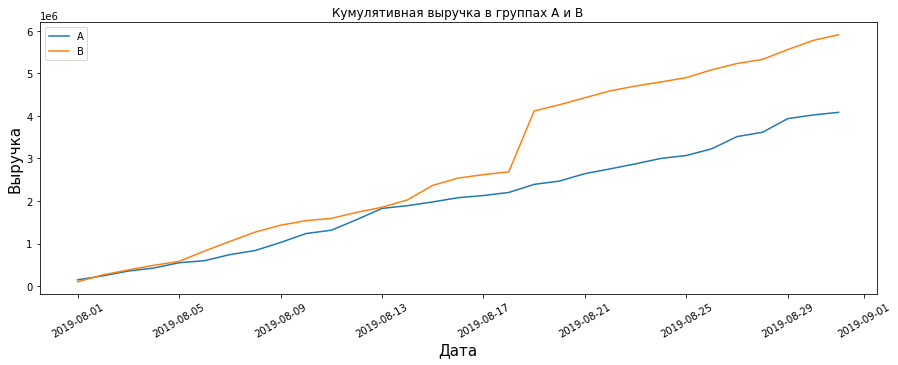

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB =cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]
# построим график
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка в группах А и В', fontsize=12)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Выручка', fontsize=15)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

**Вывод** На графике видно, что выручка обоих груп плавно росла примерно в одинаковом темпе до 13 августа, далее у группы А был небольшой резкий подъем 12-13 августа. Выручка группы В с 13 августа прорывается вверх относительно группы А, был резкий подъем выручки с 18 августа по 19 августа и далее выручка группы В росла вверх, выручка группы А тоже росла, но без таких резких подъемов. Возможно в группу В попали какие-то очень крупные заказы, мог увеличится средний чек или увеличилось количество заказов. 

### Построим график кумулятивного среднего чека по группам. Сделайте выводы и предположения.


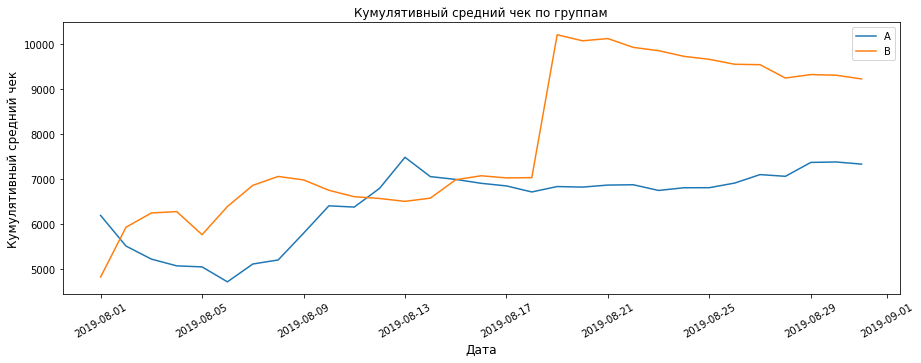

In [25]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивный средний чек', fontsize=12)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

**Вывод** По графику среднего чека видим, что у группы В он поднимался и немного падал в начале месяца, далее резко возрос с 18 августа, значит была крупная продажа. У группы А сначала месяца средний чек упал, после 5 августа начал подниматься и с 13 числа стабильно был на своем уровне, к концу месяца немного рос вверх. О разнице средних чеков в группе пока сложно говорить.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 


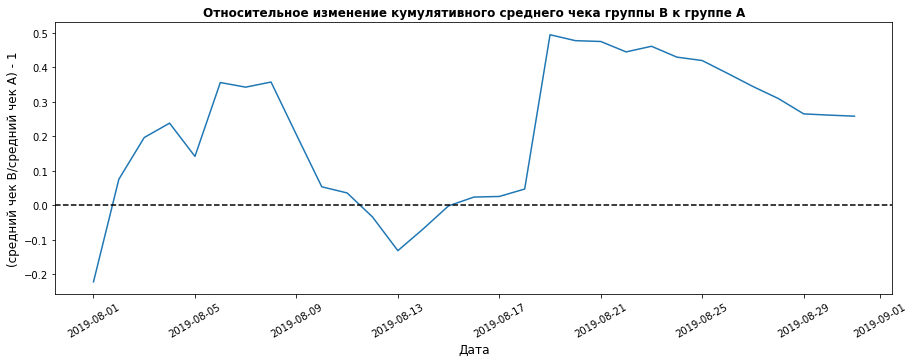

In [26]:
# собираем данные в один датафрейм и строим график
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(средний чек В/средний чек А) - 1', fontsize=12)
plt.xticks(rotation=30)
plt.show()

**Вывод** Видно, что в течении месяца было два больших пика у показателей среднего чека, после взлета показатели падали, возможно на это повлияли аномально большие заказы, оформленные в этот период времени.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. 

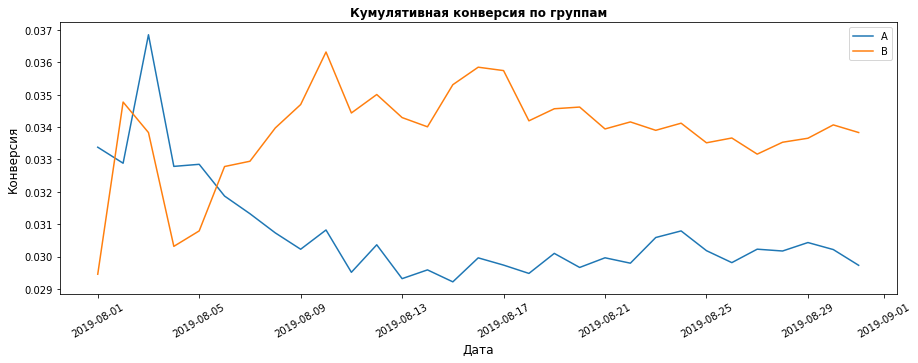

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе В
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.xticks(rotation=30)
plt.show()

**Вывод** В первую неделю теста в обеих группах происходит скачок конверсии, после чего группы расходятся. В группе А просиходит снижение конверсии с 0.037 до уровня 0.030, далее на конверсия остается на уровне 0.030. В группе B после скачка до 0.035 происходит резкое снижение значения конверсии до 0.031 с последующим постепенным ростом до 0.036 и далее конверсия стабильна, примерно в диапозоне 0.034-0.035.

В начале месяца конверсии групп колебались, но довольно быстро выровнялись и результат группы В оказался стабильно лучше, чем в группе А.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.


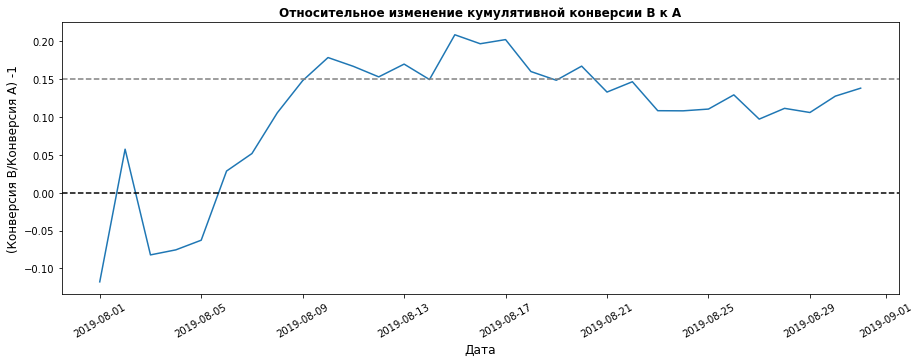

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии В к А', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(Конверсия В/Конверсия А) -1', fontsize=12)
plt.xticks(rotation=30)
plt.show()

**Вывод** После начала теста конверсия группы В взлетела по отношению к группе А и до конца теста оставалась выше. Рост не плавный, скорее всего из-за неравномерности стоимости и количества заказов в интернет-магазине.

### Построим точечный график количества заказов по пользователям. 


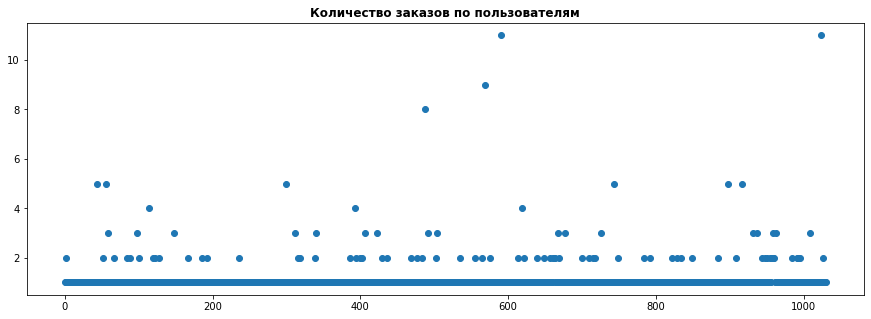

In [29]:
# создадим датафрейм с количеством заказов по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['visitorid','orders']
#display(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 

# построим точечный график количества заказов по пользователям, серия из чисел от 0 до количества наблюдений в ordersByUsers

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

**Вывод** По графику видно, что в основном пользователи делают 1-2 заказа, 3 заказа еще меньше. Большее количество заказов на пользователля скорее всего являются аномальными значениями, выбросами.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [30]:
np.percentile(ordersByUsers['orders'], [95, 99]) #считаем перцентили количества заказов на пользователя

array([2., 4.])

**Вывод** Видно, что не более 5% пользователей оформили 2 заказа, 1% - 4 заказа. Аномальным пользователем будем считать того, кто сделал более 3 заказов.

### Построим точечный график стоимостей заказов. Сделайте выводы и предположения.

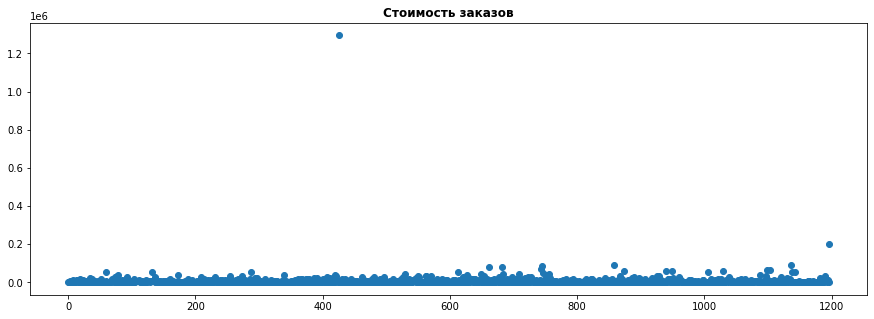

In [31]:
# Построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.show()

**Вывод** На графике видим заказы, которые вибиваются из общей канвы. Посчитаем перцентили 95 и 99й.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.


In [32]:
np.percentile(orders['revenue'], [95, 99]) #считаем перцентили

array([28000. , 58233.2])

**Вывод** 95 перцентиль - значит не более 5% заказов на сумму более 28000 и 1% заказов дороже 58233.2 . Границей для определения аномальных заказов будут заказы свыше 28000 рублей.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.


In [33]:
# подготовим датафрейм с фактическими и кумулятивными данными по дням:

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = (ordersADaily
                      .apply(lambda x:ordersADaily[ordersADaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateA':'sum',
                                    'revenuePerDateA':'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = (ordersBDaily
                      .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateB':'sum',
                                    'revenuePerDateB' : 'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
       )

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [34]:
# создадим для каждой группы датафрейм с количеством заказов на пользователя

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

# создадим списки с числом заказов каждого пользователя, включая нули

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [47]:
# функция для проверки гипотезы о равенстве групп dataA и dataB
def stat_hypothesis(dataA, dataB):
    # Нулевая гипотеза H0: между группами dataA и dataB нет статистически значимой разницы
    alpha = 0.05
    p_value = stats.mannwhitneyu(dataA, dataB)[1]

    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами разница есть")
    else:
        print("Не получилось отвергнуть нулевую гипотезу: разницы между группами нет")
    print("Относительное различие в средних группы В к группе А: {0:.1%}".format(dataB.mean()/dataA.mean()-1))

**Нулевая гипотеза H0 - "Cтатистически значимых различий в конверсии между группами нет"**
**Альтернативная гипотеза H1 - "Статистически значимые различия в конверсии между группами есть"**

In [48]:
stat_hypothesis(sampleA, sampleB)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами разница есть
Относительное различие в средних группы В к группе А: 13.8%


**Вывод** Р-value равен 0.017 это меньше, чем 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем, значит между группами есть разница. Относительный прирост конверсии группы B к группе А составляет 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.


In [49]:
stat_hypothesis(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу: разницы между группами нет
Относительное различие в средних группы В к группе А: 25.9%


**Вывод** p-value 0.7 это больше, чем 0.5, значит по среднему чеку нулевую гипотезу отвергать нельзя. По очищенным данным результат возможно будет другим. Относительно различие средних здесь 25.9%, выше у группы В.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

In [42]:
# Выделим из базы "аномальных" пользователей (совершивших более 3-го заказов или сумма заказа которых более 28000):

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], [95, 99])[0]+1)]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], [95, 99])[0]+1)]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display('Количество "аномальных" пользователей:', abnormalUsers.shape[0])

'Количество "аномальных" пользователей:'

63

In [43]:
# создадим списки с числом заказов каждого пользователя, включая нули, но уже по очищенным данным:

sampleAFiltered = pd.concat([ordersByUsersA[~(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[~(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [44]:
stat_hypothesis(sampleAFiltered, sampleBFiltered)

P-value: 0.018
Отвергаем нулевую гипотезу: между группами разница есть
Относительное различие в средних: 14.8%


**Вывод** По очищенным данным результат не сильно изменился, P-value равен 0.018, нулевую гипотезу отвергаем, разница есть. Относительное различие средних 14.8%, немного выше, чем по сырым данным на 1%. Конверсия группы В на почти 15% выше, чем группы А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


In [50]:
(stat_hypothesis(
    orders[(orders['group']=='A') & ~(orders['visitorid'].isin(abnormalUsers))]['revenue'], 
    orders[(orders['group']=='B') & ~(orders['visitorid'].isin(abnormalUsers))]['revenue'])
)

P-value: 0.977
Не получилось отвергнуть нулевую гипотезу: разницы между группами нет
Относительное различие в средних группы В к группе А: -1.7%


**Вывод** По сырым данным результат был 0.7, по очищенным p-value 0.977, почти 10. Отвергнуть нулевую гипотезу нельзя, разницы между группами по среднему чеку нет. Относительное различие в средних группы В к группе А равен -1.7%, т.е., это значит, что результаты группы А лучше, чем у группы В на 1.7%.

**Решение** 

1. Между конверсией в группах есть статистически важные различия, конверсия в групе B относительно группы A выше, по сырым и очищенным данным. По среднему чеку различий нет. Конверсия значительно выше у группы B. Цель исследования увеличить выручку интернет-магазина, конверсия влияет на выручку.

2. По анализу результатов A/B-теста принято решение остановить тест, зафиксировав победу тестовой группы.